# Journal 1

Group: 25

Members: 
- Sameer Ahmad Habibi
- Kasper Juul Hermansen
- Anton Brix Torø

Due date: 26.02.2019

The journal consists of: L01, L02, L03 and their sub-exercises

## L01

### intro

L01 intro.py is all about getting used to machine-learning with python. A few scenarios has been prepared beforehand, and are expected to be analysed and certain algorithms are used to fit lines to the data, the curves are then analysed and scores. Various different algoritms and scoring mechanisms are compared analysed.

The exercise L01 will end up with an overview of the processes of how data is analysed and used in machine learning.

#### Qa) The $\theta$ parameters and the $R^2$ Score

##### Introduction

Qa is about getting into and using the LinearRegression algorithm from sklearn. A model will be fitted with the linear regression algorithm, the outcome is a model that will be scored according to $R^2$. Which is then analysed and presented through questions. The data from the lifesatisfaction data are used for this exercise and will be used in the next exercises also.

##### Exercise

In [ ]:
# Preparation

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
import os

# Prepare function
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

# Prepare path
datapath = os.path.join("data", "lifesat", "")

# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

In [2]:
# Exercise

from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)

##### Results

$$
\begin{array}{rcll}
    R^2 &=& 1 - u/v\\
    u   &=& \sum (y_{true} - y_{pred})^2   ~~~&\small \mbox{residual sum of squares}\\
    v   &=& \sum (y_{true} - \mu_{true})^2 ~~~&\small \mbox{total sum of squares}
\end{array}
$$

- Extract the score=0.734 for the model using data (X,y) and explain what $R^2$ score measures in broad terms
  - **Answer:** $R^2$ measures the closeness of the fitted curve to the data sets. It is calculated with squares of the predictions against the real data. If a $R^2$ is measured, the data is on the fitted line. A closer value to zero will mean that the data is spread out too much for the LinearRegressor

In [3]:
print("\n> Finding R²")
print(f"R² score: {reg.score(X,y)}")


> Finding R²
R² score: 0.734441435543703


##### Questions

- How do you extract the $\theta_0$ and $\theta_1$ coefficients in his life-satisfaction figure form the linear regression model?
  - **Answer:** $\theta_0$ and $\theta_1$ can be accessed with `reg.coef_ and reg.predict with an x value of 0`

In [4]:
print("𝜃_0: " + str(reg.predict([[0]])[0,0]))
print(f"𝜃_1: " + str(reg.coef_[0][0]))

𝜃_0: 4.853052800266436
𝜃_1: 4.911544589158484e-05


- with $y_{true}$ being the true data, $y_{pred}$ being the predicted data from the model and $\mu_{true}$ being the true mean of the data.
  - **Answer:** $R^2$ is calculated by finding the squares of the data of the actual and predicted data to the fitted graph. This data can then be measured of how large the squares are, the smaller they are the better the fit. The value is measured from the residual sum of squares and the total sum of squares. This produces a percentage of how good the fit is. 0 is impossible to hit, but it shows an indicator that the graph is very far from actual values. With the value of 1 the line will be exacly on the data.
- What are the minimum and maximum values for $R^2$?
  - **Answer:** 0 is the minimum value and represents a fit, where the approximated line, doesn't fit the data. 1 is the maximum value and represents a fit, where the data is on the approximated line.
- Is it best to have a low $R^2$ score (a measure of error/loss via a cost-function) or a high  $R^2$ score (a measure of fitness/goodness)? 
  - **Answer:** The scores serve a different purpose. A low score can typically mean, that either the data is too scattered for an approximation with Linear Regression or that it will can be used as the median for the data. A high score, means that the bulk of the data is on the line, with few outliers. This can be great for showing that the model fits. In terms of which is most beneficial, then a high score will represent a line that is very well approximated for the data.

##### Discussion

In the exercise the $R^2$ score is found for the fitted model, the result is somewhat mediocre, as the score only amounted to around 0.73, which is a somewhat poor model. It loses some detail, and it is clear that the model, doesn't exactly follow a line, as produced by the linear regression.

$\theta_0 and  \theta_1$ are  found, through the reg.coef and predicting the y value for x = 0

##### Conclusion

The model was fitted for the lifesatisfaction data set, the model was then scored and the line (model) was found to be $\theta_0$ and $\theta_1$ as shown above

#### Qb) Using k-Nearest Neighbors

##### Introduction

K-Nearest neighbor is an algorithm, that map each data point to k amount of neightbors, this is a different type of algorithm than linear regression, as such the two are compared with their scores and plots. 

##### Exercise

In [5]:
# Preparation

oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
#oecd_bli.head(2)

gdp_per_capita = pd.read_csv(datapath+"gdp_per_capita.csv", thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a")
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)
#gdp_per_capita.head(2)

full_country_stats = pd.merge(left=oecd_bli, 
                              right=gdp_per_capita, 
                              left_index=True, 
                              right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)
#full_country_stats

remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

sample_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [6]:
# Exercise
sample_data

GDP per capita  Life satisfaction
Country                                           
Russia                 9054.914                6.0
Turkey                 9437.372                5.6
Hungary               12239.894                4.9
Poland                12495.334                5.8
Slovak Republic       15991.736                6.1
Estonia               17288.083                5.6
Greece                18064.288                4.8
Portugal              19121.592                5.1
Slovenia              20732.482                5.7
Spain                 25864.721                6.5
Korea                 27195.197                5.8
Italy                 29866.581                6.0
Japan                 32485.545                5.9
Israel                35343.336                7.4
New Zealand           37044.891                7.3
France                37675.006                6.5
Belgium               40106.632                6.9
Germany               40996.511                7.0
Finland               41973.988                7.4
Canada                43331.961                7.3
Netherlands           43603.115                7.3
Austria               43724.031                6.9
United Kingdom        43770.688                6.8
Sweden                49866.266                7.2
Iceland               50854.583                7.5
Australia             50961.865                7.3
Ireland               51350.744                7.0
Denmark               52114.165                7.5
United States         55805.204                7.2

In [7]:
country_stats

GDP per capita  Life satisfaction
Country                                           
Russia                 9054.914                6.0
Turkey                 9437.372                5.6
Hungary               12239.894                4.9
Poland                12495.334                5.8
Slovak Republic       15991.736                6.1
Estonia               17288.083                5.6
Greece                18064.288                4.8
Portugal              19121.592                5.1
Slovenia              20732.482                5.7
Spain                 25864.721                6.5
Korea                 27195.197                5.8
Italy                 29866.581                6.0
Japan                 32485.545                5.9
Israel                35343.336                7.4
New Zealand           37044.891                7.3
France                37675.006                6.5
Belgium               40106.632                6.9
Germany               40996.511                7.0
Finland               41973.988                7.4
Canada                43331.961                7.3
Netherlands           43603.115                7.3
Austria               43724.031                6.9
United Kingdom        43770.688                6.8
Sweden                49866.266                7.2
Iceland               50854.583                7.5
Australia             50961.865                7.3
Ireland               51350.744                7.0
Denmark               52114.165                7.5
United States         55805.204                7.2

X.shape= (29, 1)
y.shape= (29, 1)


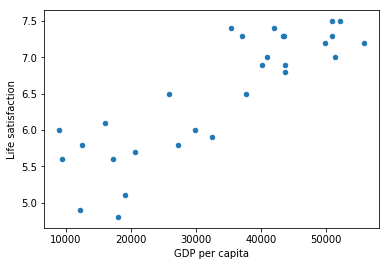

In [8]:
# Prepare the data
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

print("X.shape=",X.shape)
print("y.shape=",y.shape)

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')

In [9]:
# Exercise

reg = LinearRegression().fit(X, y)
clf=sklearn.neighbors.KNeighborsRegressor(n_neighbors=3).fit(X,y)

In [10]:
# Result

country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.plot(X, reg.predict(X), "r")
plt.plot(X, clf.predict(X), "b")
plt.show()

In [11]:
print(f"KNearest score:        {clf.score(X,y)}") 
print(f"LinearReg R² score:    {reg.score(X,y)}") 

KNearest score:        0.8525732853499179
LinearReg R² score:    0.734441435543703


##### Questions

- What do the k-nearest neighbours estimate for Cyprus, compared to the linear regression (it should yield=5.77)?
  - **Answer:** As seen below it measures to:
 

In [12]:
X_new = [[22587]] # Cyprus' GDP per capita

print(f"KNearest Prediction:   {clf.predict(X_new)[0,0]}")
print(f"LinearReg Prediction:  {reg.predict(X_new)[0,0]}")

KNearest Prediction:   5.766666666666666
LinearReg Prediction:  5.962423376619663


- What _score-method_ does the k-nearest model use, and is it comparable to the linear regression model?
  - **Answer:** KNearest uses another score-method. The score method is based on the mean for each value and the fitted line. This produces a percentage of how closely the data is fitting the line.
- Seek out the documentation in Scikit-learn, if the scoring methods are not equal, can they be compared to each other at all then?
  - **Answer:** While calculated differently they each serve the same purpose, evaluating the fitted line. Both a measured in percentages as well.

##### Discussion

A model for KNearest has been fitted to the lifesatisfaction dataset with a k-value of 3, meaning that it datapoints will compare and set to the three nearest neightbors. This will produce a model that is very different from Linear Regression, as seen in the plots. The scores of K-nearest and Linear regression are compared, and kNearest with a score of 0.85 is a closer fit to the data. But the algorithms to measure the scores are also different, so the results may vary. However, they still work around the same principle, data compared with the fitted model, as such they are a fair estimate of hour accurate our fitted model is.

##### Conclusion

K nearest has been fitted, and data has been predicted from our models (KNear and LinReg), the test data used is cypress, but as data isn't as visible, it is difficult to measure just how good a fit the prediction is. Therefor a score for k-nearest neightbor and linear regression is shown. The results show that k-nearest neightbor is a slightly better fit for our data. Which can also be seen from the plot above (red is linear regression and blue is k-nearest neightbor)

#### Qc) Tuning Parameter for k-Nearest Neighbors and A Sanity Check

##### Introduction

Qc is about tuning k-nearest neighbors and understanding what the k-value does for the model. The results should show various smoother and smoother models as k-near goes to the maximum length of the dataset

##### Exercise

In [13]:
# Preparation

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [14]:
# Exercise

def knearest_interaction(x):
    sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
    plt.axis([0, 60000, 4, 8])

    # create an test matrix M, with the same dimensionality as X, and in the range [0;60000] 
    # and a step size of your choice
    m=np.linspace(0, 60000, 1000)
    M=np.empty([m.shape[0],1])
    M[:,0]=m

    reg = LinearRegression().fit(X, y)
    clf=sklearn.neighbors.KNeighborsRegressor(n_neighbors=x).fit(X,y)

    # TODO from this test M data, predict the y values via the lin.reg. and k-nearest models
    y_pred_lin = reg.predict(M)
    y_pred_kn  = clf.predict(M)

    # TODO use plt.plot to plot x-y into the sample_data plot...
    plt.plot( M, y_pred_lin , "r")
    plt.plot( M, y_pred_kn , "b")

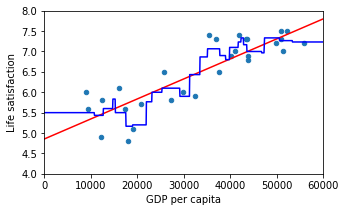

<function __main__.knearest_interaction(x)>

In [15]:
# Result

interact(knearest_interaction, x=widgets.IntSlider(min=1,max=10,step=1,value=3))

##### Questions

- Does ```k_neighbor=1``` not look beautiful regarding the score (should yield score=1)? ...or does it?
  - **Answer:** A score of 1 is a prediction that the figged algorithm has been fitted exactly to the data. This is problematic if the data is chaotic (noisy). Instead it should be smoothed a bit, to produced a better and more consistent prediction.
- Plot the two models in a 'Life Satisfaction-vs-GDP capita' 2D plot by creating an array in the range 0 to 60000 (USD) and then predict the corresponding y value. Reuse the plots stubs below, and explain why the k-nearest neighbour with ```k_neighbor=1``` has such a good score.
  - **Answer:** KNearest has a high score for a low k_neighbor count, because the fitting is directly on the data points. The red line is the linear regressor, the blue is Knear

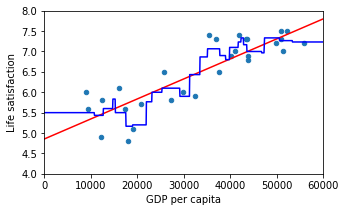

<function __main__.knearest_interaction(x)>

In [16]:
# Result 
interact(knearest_interaction, x=widgets.IntSlider(min=1,max=10,step=1,value=3))

- Does a score=1 with ```k_neighbor=1```also mean that this would be the prefered estimator for the job?
  - **Answer:** A score of one will result in the lines connecting each point. Because of that the mean of the estimated distance from the predicted value and the actual values will be the same resulting in a score of 1.0. This score while from the outset looks nice, it doesn't have a very smooth transition between the points. For a better estimate k_nearest can be incremented, until a smoother line appears, that doesn't have as jagged edges.   

##### Discussion

As seen above with the interactive slider, a k-nearest neightbor with a value of one, will map directly to the data points. Production a very low resolution model, that is fitted directly to the train data. It will produce a score of 1, as it is closely fitted to the data. As the k-value rises the model will become smoother and smoother, producing a lower score, but probably a far better prediction. This however, isn't tested in this exercise. 

##### Conclusion

With the interactive slider above, it's possible to tune k-nearest neightbors, to a chosen fitting, the amount of resolution/subdivision can be chosen and analysed. 

## L02

### math

This exercise L02 math is about getting to know the math of some important concepts of machine-learning, such as vectors, matrices, metrics, norms, distances, etc. This also serves as the foundational knowledge, on which to build on the in the next exercises.

#### Qa) Given the following $\mathbf{x}^{(i)}$'s, construct and print the $\mathbf X$ matrix in python.

##### Introduction

In this exercise, a matrix is set up for a given set of data. The matrix should consist of four vectors, which is transposed to compose the matrix X.

##### Exercise

$$
    \newcommand\rem[1]{}
    \rem{ITMAL: CEF def and LaTeX commands, rember: no newlines in defs}
    \newcommand\eq[2]{#1 &=& #2\\}
    \newcommand\ar[2]{\begin{array}{#1}#2\end{array}}
    \newcommand\ac[2]{\left[\ar{#1}{#2}\right]}
    \newcommand\st[1]{_{\mbox{\scriptsize #1}}}
    \newcommand\norm[1]{{\cal L}_{#1}}
    \newcommand\obs[2]{#1_{\mbox{\scriptsize obs}}^{\left(#2\right)}}
    \newcommand\diff[1]{\mbox{d}#1}
    \newcommand\pown[1]{^{(#1)}}
    \def\pownn{\pown{n}}
    \def\powni{\pown{i}}
    \def\powtest{\pown{\mbox{\scriptsize test}}}
    \def\powtrain{\pown{\mbox{\scriptsize train}}}
    \def\bX{\mathbf{X}}
    \def\bx{\mathbf{x}}
    \def\bw{\mathbf{w}}
    \def\by{\mathbf{y}}
    \def\bz{\mathbf{z}}
    \def\btheta{{\boldsymbol\theta}}
    \def\half{\frac{1}{2}}
$$ 

$$
    \ar{rl}{
      \bx\pown{1} &= \ac{c}{ 1, 2, 3}^T \\
      \bx\pown{2} &= \ac{c}{ 4, 2, 1}^T \\
      \bx\pown{3} &= \ac{c}{ 3, 8, 5}^T \\
      \bx\pown{4} &= \ac{c}{-9,-1, 0}^T
    }
$$ 

In [17]:
# Preparation

import numpy as np

In [18]:
# Exercise

y = np.array([1,2,3,4]) # NOTE:  you'll need this later
X = np.array(
    [
        [ 1, 2, 3],
        [ 4, 2, 1],
        [ 3, 8, 5],
        [-9,-1, 0]
    ]
)

In [19]:
# Result

print(f"X = \n{X}")

X = 
[[ 1  2  3]
 [ 4  2  1]
 [ 3  8  5]
 [-9 -1  0]]


##### Discussion

The values of the matrix has been added from the data above, the matrix is built with np.array, which uses the numpy python library, for numerical python calculations.

##### Conclusion

An X matrix is produced, to be used in the next exercises.

#### Qb) Implement the $\norm{1}$ and $\norm{2}$ norms for vectors in python.

##### Introduction

The methods for finding the $\norm{1}$ city-block (norm) and $\norm{1}$ Euclidian distance (norm) is to be defined in this exercise. Using purely python, with only a little help from utility libraries, such as numpy. The data is then compared with solutions from numpy.

##### Exercise

In [20]:
# Preparation
import math
import numpy as np
from math import sqrt, fabs

eps=1E-9

expected_d1=8.0
expected_d2=4.242640687119285

In [21]:
# Exercise

def L1(x):
    if np.nonzero(x) == True:
        raise ValueError(f"A is a zero vector")
    sum = 0
    for cell in x:
        sum += abs(cell)
    return sum

def L2(x):
    if np.nonzero(x) == True:
        raise ValueError(f"A is a zero vector")
    sum = 0
    for cell in x:
        sum += cell**2
        
    return math.sqrt(sum)

def L2Dot(x):
    return math.sqrt(np.dot(x, np.transpose(x)))

tx=np.array([1, 2, 3, -1])
ty=np.array([3,-1, 4,  1])

d1=L1(tx-ty)
d2=L2(tx-ty)
d2dot=L2Dot(tx-ty)

# Test
assert fabs(d1-expected_d1)<eps, "L1 dist seems to be wrong" 
assert fabs(d2-expected_d2)<eps, "L2 dist seems to be wrong" 
assert fabs(d2dot-expected_d2)<eps, "L2Ddot dist seem to be wrong" 

In [22]:
# Result

print("tx-ty=",tx-ty,"\nd1-expected_d1=",
      d1-expected_d1,"\nd2-expected_d1=",
      d2-expected_d2, sep='')
print("d2dot-expected_d2=",d2dot-expected_d2)

tx-ty=[-2  3 -1 -2]
d1-expected_d1=0.0
d2-expected_d1=0.0
d2dot-expected_d2= 0.0


##### Discussion

$\norm{1}$ and $\norm{2}$ are defined with functions L1 and L2 respectively, these will produce our metrics, which will describe our vectors, and the distances between them. 

##### Conclusion

The methods were defined, and as shown in the test data, they produce accurate results. Only np.nonzero was used to determine if a vector was nil. Lastly, L2Dot was produced, showing how to setup the functions with numpy's utility functions

#### Qc) Construct the Root Mean Square Error (RMSE) function

##### Introduction

This exercise is about defining a function for calculating RMSE (root mean square error) and thereby MSE (mean square error). This function is generally used as a loss function, and it is the fitting algorithms, job to minimize the outcome of this function, when tested on the models. These metrics is used in algorithms like linear regression.

##### Exercise

In [23]:
# Preparation

from math import sqrt

eps=1E-9
expected=6.576473218982953

In [24]:
# Exercise

def MSE(X, y):
    if len(X) != len(y):
        raise ValueError(f"X {len(X)} != {len(y)}")
    A = X-y
    if np.nonzero(A) == True:
        raise ValueError(f"A is a zero vector")
    return L2(A)**2/len(A)

def RMSE(X, y):
    if len(X) != len(y):
        raise ValueError(f"X {len(X)} != {len(y)}")
    return math.sqrt(MSE(X, y))

# TEST vector:
def h(X):    
    if X.ndim!=2:
        raise ValueError("expected X to be of ndim=2, got ndim=",X.ndim)
    if X.shape[0]==0 or X.shape[1]==0:
        raise ValueError("X got zero data along the 0/1 axis, cannot continue")
    return X[:,0]

r=RMSE(h(X),y)

# Test
assert r-expected<eps, "your RMSE dist seems to be wrong" 

In [25]:
# Result

print("RMSE=",r,", diff=",r-expected, sep='')

RMSE=6.576473218982953, diff=0.0


##### Discussion

The MSE was found, which uses the L2 function defined in Qb, this is part of the definition for MSE. The RMSE is found by squaring the MSE. These functions are used as performace metrics and internals of the fitting algorithms, to give an indication of how good the fitting is, and if it should be iterated on again. It is also called a loss function, and it works as seen in the R² scoring metric, to calculate the Sum of Squares which is used there.

##### Conclusion

The RMSE and MSE are defined, according to their mathematical definitions, and the data is compared with some previously defined (expected) data.

#### Qd) Similar construct the Mean Absolute Error (MAE) function

##### Introduction

In this exercise, MAE is defined, it is similar to MSE, except it uses L1 instead of L2.

##### Exercise

In [26]:
# Preparation

expected=3.75

In [27]:
# Exercise

def MAE(x, y):
    if len(x) != len(y):
        raise ValueError(f"X {len(x)} != {len(y)}")
    A = x - y
    if np.nonzero(A) == True:
        raise ValueError(f"A is a zero vector")
    return L1(A)/len(A)

r=MAE(h(X), y)
assert r-expected<eps, "MAE dist seems to be wrong" 

In [28]:
# Result

print("MAE=",r,", diff=",r-expected, sep='')

MAE=3.75, diff=0.0


##### Discussion

The MAE was defined in much the same way as MSE, buth with L1 instead of L2. as such it's calculations are slightly different internally, but as L2 is of the same family as L1, it isn't too different.

##### Conclusion

The MAE was defined and tested, and an expected result was found.

#### Qe) Robust Code

##### Introduction

This exercise is about learning some python testing and validation, and should be seen as an exercise to enhance, the above definitons, with more robust code.

##### Exercise

Test cases has been added above. With asserts check all functions from L02/math

##### Discussion

In this exercise, the result have been enhancement of the previous exercises, such as len checks, to correctly evaluate the data for the mathematical definitions. Errors should be raised (exceptions thrown) for incorrect values, asserts has also been added as test code for the results.

##### Conclusion

Enhancement for above functions, has taken place, such as adding checks for length of vectors and the symmetry of them. The same can be said for checks for zero-vectors.

### statistics

Statistics is about learning about, different kinds of data analysis tools, used in well, data analysis and it's effect on machine learning. This section should provide a picture of how data is structured, and provide value in how data is looked at.

#### Qa) Create a mean and variance function for some input data

##### Introduction

Qa is about learning about mean and variance. And the diffences with biased and biased calculations. This exercise, should also enhance common python knowledge for future sections. A function for getting the mean and variance of the data should be defined and tested.

##### Exercise

In [29]:
# Preparation
import numpy as np
expected_m = 2.5  
expected_v_biased = 1.25 # factor 1/n
expected_v_unbiased = 1.6666666666666667 # factor 1/(n-1)

In [30]:
# Exercise

def MeanAndVariance(x, biased=True):
    if biased == True:
        return np.mean(x), np.var(x) # 1/N
    else:
        return np.mean(x), np.var(x, ddof=1) # 1/N-1
    
y = np.array([1,2,3,4])
m, v = MeanAndVariance(y)
m, v_ub = MeanAndVariance(y, biased=False)

In [31]:
# Result

print("m=",m,", diff=", m-expected_m)
print("v=",v,", diff=", v-expected_v_biased)
print("v_unbiased=",v_ub,", diff=", v_ub-expected_v_unbiased)

m= 2.5 , diff= 0.0
v= 1.25 , diff= 0.0
v_unbiased= 1.6666666666666667 , diff= 0.0


##### Discussion

numpy's utilities, such as mean and var is used to first produce a mean and a biased variance. It is possible to get the unbiased value but giving the function a bool, to specify if a biased or unbiased outcome is wanted. The mean and variance, tells something about the data itself, and more specifically, how it close and varied it is. The mean value is an excellent indicator of the 'average' of the data, regardless of outliers, that the average usually is heavily affected by. The variance, tells something about the variation of the data, and is usually a bit more tricky to analyse, it is a value that tells about how far the data is spread from the mean.

##### Conclusion

A mean and variance function is defined to analyse vectors.

#### Qb) Create a function that generates the auto-covariance matrix $\bSigma(\bX)$.

##### Introduction

This about finding convariance of a matrix. The covariance tells something about the internal structure of the data in the matrix to each other. A function is defined, that takes a matrix and returns a square matrix, containing the outcome. A biased and unbiased version should be available.

##### Exercise

In [32]:
# Preparation

def covar(x, y, biased=False):
    x_mean, y_mean = x.mean(), y.mean()
    if biased == False:
        return np.sum((x-x_mean)*(y-y_mean))/(len(x) - 1)
    else:
        return np.sum((x-x_mean)*(y-y_mean))/(len(x))

def coveriance(X):
    return np.array([
        [covar(X[0], X[0]), covar(X[0], X[1])],
        [covar(X[1], X[0]), covar(X[1], X[1])]
    ])

In [33]:
# Exercise

x = np.random.normal(0, 1, 500)
y = np.random.normal(0, 1, 500)
X = np.vstack((x, y))

expected_cov_X_Y = np.cov(X, rowvar=True)
cov = coveriance(X)

In [34]:
# Result

print("\ncov=\n", cov, "\ndiff=\n", np.round(cov, 6)-np.round(expected_cov_X_Y, 6))


cov=
 [[0.90139547 0.03923976]
 [0.03923976 1.1096328 ]] 
diff=
 [[0. 0.]
 [0. 0.]]


##### Questions

- Explain the elements in the $\Sigma$ matrix, what are the diagonal elements $\Sigma_{ii}$, and what does off-diagonal elements, $\Sigma_{ij}$ for $i \neq j$ represent?
  - **Answer:**  
The diagonal entries are the variances and the other entries are covariance

##### Discussion

The coveriance of a large matrix is found. A method is defined according to the mathematical definition, which should give insight into how the data is structured. A method is set up, and compared with numpy's implementation, with row variable enabled.

##### Conclusion

A definition for covariance is defined and implemented, and tested with random numbers, to illustrate that it can work on different sets, of arbitrary size.

## L03

L03 is about getting to know python and getting some more in-depth work with datasets, as seen from L01 - intro and how to do proper metrics. A very basic classifier is created, to give insight into the internals of machine learning, and the flow that it goes throught.

### modules and classes

L03 - modules and classes, is about learning how a python project (package) is created and how to add a folder structure for the project. It is really about the internals of python and how to utilize it's object oriented features.

#### Qa) Load and test the `libitmal` module

##### Introduction

Qa is about loading the libitmal package from another directory. A suitable method is called to very that it works. 

##### Exercise

In [35]:
# Preparation

import sys,os

path = "/home/hermansen/Desktop/jupyter/itmal/itmal-25/itmal-25f"

sys.path.append(os.path.expanduser(path))

In [36]:
# Exercise

from libitmal import utils as itmalutils

In [37]:
# Result
print(itmalutils.__file__)
print()

print("Testing itmalutils")
print()
itmalutils.TestAll()

/home/hermansen/Desktop/jupyter/itmal/itmal-25/itmal-25f/libitmal/utils.py

Testing itmalutils

TestPrintMatrix...(no regression testing)
X=[[   1.    2.]
   [   3. -100.]
   [   1.   -1.]]
X=[[ 1.  2.]
   ...
   [ 1. -1.]]
X=[[   1.
       2.    ]
   [   3.0001
    -100.    ]
   [   1.
      -1.    ]]
X=[[   1.    2.]
   [   3. -100.]
   [   1.   -1.]]
OK
TEST: OK
ALL OK


##### Discussion

The libitmal utils.py is found at a path, as defined above. This is instead of adding it to PATH, which isn't very clear for showing it in the journal. It could however easily be set to a more permanent path, in either environment variables in windows or in .bashrc / .zshrc in linux. `export PATH=path_to_lib/:PATH`

##### Conclusion

The libmalutils library was tested, with the TestAll() function and everything seem to be called (works).

#### Qb) Create your own module, with some functions, and test it

##### Introduction

libherm is created in the same folder as libmal, and by using the PATH defined above, it can easily be pulled via. a normal import statement. For showcase purposes, all the code in the libherm/utils.py is printed in formatted text for easier showcase, as it is more convenient.

##### Exercise

In [38]:
# Preparation

from libherm import util

In [39]:
# Exercise

# See libherm

```python
# libherm ...
class Dummy():
    def hello_world(self):
        print("Hello World!")
```

In [40]:
dummy = util.Dummy()

In [41]:
# Result

dummy.hello_world()

Hello World!


##### Discussion

A hello world function is defined for the project libherm. A __init__.py file is created alongside the util.py file, that holds the dummy class. This is for enabling python packaging and project navigation.

##### Conclusion

As seen above the hello_world() method is defined for the dummy package and called, which prints a nice "Hello, World!" to greet the world!

#### Qc) How do you 'recompile' a module?

##### Introduction

Jupyter has the kink, that it loads a project into memory from the __pycache__ folders, that are "compiled", this however, isn't easily rebooted, as it will not reload a project that has been loaded, even if it has changed on disk. This however, can be mitigated with a autoreload statement, this autoreload, will load all imports on call. This is useful for testing shared libraries.

##### Exercise

In [42]:
# Preparation

%load_ext autoreload

In [43]:
# Exercise

%autoreload

In [44]:
# Result

dummy.hello_world()

Hello World!


##### Discussion

An autoreload is loaded and used with IPython magic function syntax. This will reload every module on call. For showcase purposes dummy.hello_world() is changed again, it is however, not easily shown that the outcome will load directly from disk, you'll just gonna have to believe us. 

##### Conclusion

an autoreload magic function is used. It is possible to do this without having to use a magic function, but it required as a Jupyter kernel reboot, which is a costly operation.

#### Qd) Write a Howto on Python Modules and Packages

##### Introduction

In this exercise a howto for python modules should be explained and shown. An example structure will be shown, to show how to create a python project and how to call the various subfolders.

##### Exercise

Modules in python have to be denoted by `__init__.py` the file can be empty, and is usually used to mark the folder as a either a leaf of a project, or a root if it is the top most init.

Modules can then imported from the root of the `__init__.py`

An example can be:

```
pygraphs/
   __init__.py
   utility.py
   algorithms/
      __init__.py
      graph.py
```

The module can impored in various ways from the package:

```
import pygraphs

graph = pygraphs.utility.initialize_graph()
```

```
from pygraphs import utility

graph = utility.initialize_graph()
```

##### Discussion

A file structure is used to show how python handles modules, and how to denote a package. subfolders are used, kind of like namespaces in other languages, they are used to categorize content that are similar, as such each subfolder, fits the same module. 

##### Conclusion

A mini showcase is shown, on how a python package can look like, with its internal modules

#### Qe) Extend the class with some public and private functions and member variables

##### Introduction

In this exercise, knowledge of the python object oriented features are enhanced. As seen previously with the Dummy calss, now a full class, with private and public members are shown.

##### Exercise

In [45]:
# Preparation

# See libherm for an alternative

```python
class Point():
    def __init__(self, x, y):
        self.__x = x
        self.__y = y
```

In [46]:
# Exercise

class Cup:
    def __init__(self, color):
        self.cupsize = None       # public variable
        self._color = color       # protected variable
        self.__content = None     # private variable

    def fill(self, beverage):
        self.__content = beverage

    def output(self):
        print("Cup info: size = " ,self.cupsize, ", color = " ,self._color, ", content = " ,self.__content, "!" )

In [47]:
# Result

redCup = Cup("red") # we are able access the protected variable through the contructor
redCup.cupsize = "10" # we are able to access the public variable without using a function
redCup.fill("coffee") # to access the private variable __content we need to use the fill method
redCup.output()

Cup info: size =  10 , color =  red , content =  coffee !


- How are private function and member variables represented in python classes? 
  - **Answer:** Privacy isn't a big concept in python, but it is availble, but only for convenience. private functions & variables are denoted with private with a two leading underscores.
- What is the meaning of `self` in python classes?
  - **Answer:** Self refer to the object itself, without the self variables it refer to the class. I.E. static versus dynamic
- What happens to a function inside a class if you forget `self` in the parameter list, like `def myfun():` instead of `def myfun(self):`?
  - **Answer:** The function is defined as a static variable under the scope of the class, it won't have access to member variables of the class either. Denoted with self.

##### Discussion

Python as an interpreted language, will not hide much from the user, as all object implement certain features from abstract shadow classes, it is always possible to get the internals of a class, if wanted. It is however, possible to hide data with certain letters, such as an underscore. However, it should be noted, that nothing is truly hidden in python, and as an interpreted language, it is much different at run- /compile time than C/C++ or C#. 

##### Conclusion

Some variables are shown that are defined as either public, protected and private. Reasoning behind how to use these different kinds of variables are also shown. It is also important to note that python is a dynamic language, so we can set values to whatever we want. A string can suddenly become a float and vise-versa. 

#### Qf) Extend the class with a Constructor

##### Introduction

In this exercise a constructor is added to the above class

##### Exercise

**Constructor?**
Technically, __init__ is an initialiser. The python constructor is `__new__`. Python uses automatic two-phase initialisation - `__new__` returns a valid but (usually) unpopulated object, which then has `__init__` called on it automatically. 

**Destructor?**
In Python, destructors are needed much less, because Python has a garbage collector that handles memory management. To declare a destructor we are using the `__del__` function.

The init method can be seen in either libherm or in the above Qe class Cup or Point

**See the discussion section for more details ...**

#### Qg) Extend the class with a to-string function

##### Introduction

A to string is useful for any class, it is a class, that should return the class' internal structure as data, so that it can be copied or used easily by other methods and classes.

##### Exercise

In [48]:
# Exercise

# libherm/util.py/class point omitted for brevity

def __str__(self):
    return json.dumps({'x': self.__x, 'y': self.__y})

##### Discussion

There exists two kinds of "print" functions for a class in python, the `__repr__` and `__str__`. repr returns the internals of the class, generally it is unreadable, but can easily be translated into other objects of the same class. str on the other hand is a human-readable format that shows what important internals that the class holds, and is usually enough to create a deep copy of the object.

##### Conclusion

The `__str__` method is overwritten from the base class object and returns the coordinates of the point class.

#### Qh) Write a Howto on Python Classes

##### Introduction

This exercise is about explaining python classes with topics such as privacy, init, self and inheritance.

##### Exercise

**Public / privacy**

Public vs Private is a debate that has wrought the python community for some time, python code is a scripting language, so nothing is really 'private' if one is determined enough, private variable are excessible as everything is in memory and python doesn't try to hide things very hard. It is also against the ethos of python to hide stuff. The code should be solid enough, that private variables can be hidden or kept away with the prefix `_variable` for something, that should really be pythonish private `__variable` two underscores are prepended. This will hide it from modules that use it. It is however, still possible to pull the state of the class, and then extract the variable. However, that is how it's done.

**Constructors and Destructors**

Python doesn't really have a constructor persay, it has an init that functions just like it, and could be argued to be the same, however, the init of python, is about setting up the internal structure of the class, such as initializing internal variables and set state. Python doesn't have a destructor, either, but has a function that is much like it, a dispose function __del__ which is supposed to clean-up the function when not needed anymore, fx. reset keys etc. enter and exit are used with using statements, this is useful for both initializing and removing connections to external resources, such as the os or other machines / streams etc.

**Self**

Self, refer to the instance, and is supposed to emulate a this statement from other languages. It's a way to refer to the instance itself, as such, things not specified with self, will be static, and refer to the class itself and not the object.

**Inhertitance** 

Inheritance can easily be done in python, and is done by a subclass taking the superclass as the parameter for the class. Python is a very functional language, but it certainly isn't built like C# which is supposed to be architecturally sound. Instead, python implements Object-Oriented features, by declarations `@` or other ways, such as parameters or calls.

##### Discussion

The above reasonings as to how object oriented programming works in python, and how it should be used, for this very unique language, that has evolved over time.

##### Conclusion

This exercise has mainly focused on a discussion about certain object oriented features of python, when and how they should be used.

### datasets

Data is generally the start of any machine learning adventure, this section is about getting the data and making sense of it. This involves manipulating / generating it, and then generating some pretty plots to show the data in a meaningful way.

#### Qa) Data load function 

##### Introduction

To start of easy, a moon dataset is generated, it is a dataset that would be troublesome for most algorithms, but that is not what this section is about, this section is about data and data analysis. A dataset should be created and shown. 

##### Exercise

In [49]:
# Preparation

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from pandas import DataFrame

def MOON_GetDataSet(n_samples):
    return make_moons(noise=0.15, random_state=5, n_samples=n_samples)

def MOON_Plot(X, y):
    df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
    colors = {0:'red', 1:'blue'}
    fig, ax = plt.subplots()
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    plt.show()

In [50]:
# Exercise

X, y=MOON_GetDataSet(n_samples=200)

In [51]:
# Result

print("X.shape=",X.shape,", y.shape=",y.shape)
MOON_Plot(X,y)

X.shape= (200, 2) , y.shape= (200,)


##### Discussion

The make_moon set of sklearn is used to generate the synthetic data, it is then shown with matplotlib and pandas. to create the make moon set, a noise is used to artificially spread the data, as such the data won't stick to the make_moons algorithm.

##### Conclusion

The moons data is generated and shown by above plot, and it vaguely looks like two halfmoons facing either each other.

#### Qb) Try it with a train-test split function

##### Introduction

This function is about preparing the data for a fit-predict scheme. Using train-test split function, that will group the data into, train and test data, ready to be used for training and testing of the models.

##### Exercise

In [52]:
# Preparation

from sklearn.model_selection import train_test_split

In [53]:
# Exercise

def MOON_Plot(X, y, title="default", xlabel="", ylabel=""):
    df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
    colors = {0:'red', 1:'blue'}
    fig, ax = plt.subplots()
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(
            ax=ax, 
            kind='scatter', 
            title=title, 
            x=xlabel, 
            y=ylabel, 
            label=key, 
            color=colors[key])
    plt.show()
    
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

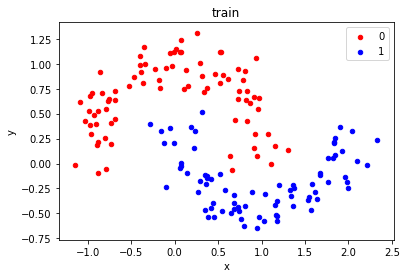

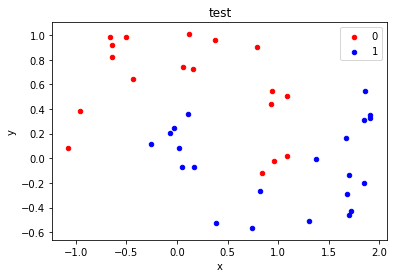

In [54]:
# Result

MOON_Plot(X, y, title="train & test", xlabel="x", ylabel="y")
MOON_Plot(X_train, y_train, title="train", xlabel="x", ylabel="y")
MOON_Plot(X_test, y_test, title="test", xlabel="x", ylabel="y")

##### Discussion

As seen above by the three plots, a complete plot of the train and test data is shown together, below is the train set, which shows only the train data, and last, but not least is shown the test set, which shows the sparse test data. This module tackles one of the problems found previously, as a model can be fitted to some data, but no there was no real way to actually test it. Now there is a way to test our model up against something, and this will elaborated on in further exercises.

##### Conclusion

The traintest split, has randomly picked samples, in a pattern of 80:20  percent split of the data for train and test data respectively. The matrices containing the data is the plotted to show the split.

#### Qc) Data load function

##### Introduction

Now its time to load some real data, and for this MNIST is used, this dataset contains handwritten numbers, of 70.000 samples. This exercise is about loading the data, and show a picture of the one of the written numbers.

##### Exercise

In [55]:
# Preparation

from sklearn.datasets import fetch_mldata
from keras.datasets import mnist

def MNIST_PlotDigit(data):
    image = data.reshape(28, 28)
    plt.imshow(image)

def MNIST_GetDataSet():
    return mnist.load_data()

Using TensorFlow backend.


In [56]:
# Exercise

(X_train, X_test), (y_train, y_test) = MNIST_GetDataSet() # Using keras, the data has already been train-test split

X_train.shape= (60000, 28, 28) , X_test.shape= (60000,)


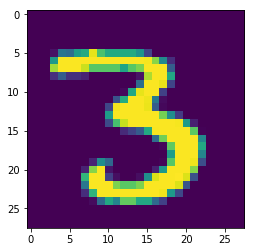

In [57]:
# Result

print("X_train.shape=",X_train.shape,", X_test.shape=",X_test.shape)
MNIST_PlotDigit(X_train[12])

##### Discussion

Using the keras.datasets.mnist the MNIST dataset is pulled and extracted, a feature of keras, is that it automatically uses train-test split on the matrix. This is according to 6:1 split for train and test data respectively. A digit is then shown with matplotlib.

##### Conclusion

The data is pulled with keras, then split, and from the code written above, the data only have to analysed and to show a sample, to check the correctness of our hypothesis (code).

#### Qd) Data load function

##### Introduction

Next is the iris dataset, which has four features, sepal.length, sepal.width, petal.length and petal width. This exercise is about creating a function that can return the dataset

##### Exercise

In [58]:
# Preparation

from sklearn.datasets import load_iris

In [59]:
# Exercise

def IRIS_GetDataSet():
    return load_iris()

##### Discussion

Using sklearn.datasets this time to pull the dataset.

##### Conclusion

The data is available through the IRIS_getDataSet function, using sklearn

#### Qe) Examine the data via scatter plots

##### Introduction

This exercise is about showing the iris data in a meaningful way, that can be compared to each of their features.

##### Exercise

In [60]:
# Preparation
import pandas as pd
from pandas.plotting import scatter_matrix 

def IRIS_Plot(X, y):
    df = pd.DataFrame(X, columns=['SepalLength','SepalWidth', 'PetalLength', 'PetalWidth'])
    
    factor = pd.Series(y)
    classes = list(set(factor))
    palette = ['#e41a1c', '#4eae4b', '#377eb8', 
               '#994fa1', '#ff8101', '#fdfc33', 
               '#a8572c', '#f482be', '#999999']
    color_map = dict(zip(classes,palette))
    colors = factor.apply(lambda group: color_map[group])
    scatter_matrix(df, c=colors, alpha=1, diagonal=None)

In [61]:
# Exercise

data = IRIS_GetDataSet()
X = data["data"]
y = data["target"]

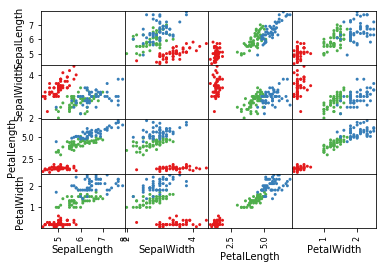

In [62]:
# Result

IRIS_Plot(X, y)

##### Discussion

A plot is shown, that compares each feature to the other. this is useful for seeing each of the different flowers compared, and how it might be possible to identify either the setosa (red), versicolor (green) or virginica (blue), with possibly a machine learning algorithm. As data scientists, we don't really have to care about what the features are, but only how the data looks. We don't have to be masters of irises, only how their features behave, and we can identify them.

##### Conclusion

A plot is shown, that shows the different irises and their features as denoted by red, green and blue.

#### Qf) Add your function to the `libitmal` python module

##### Introduction

Make a shared library in the libitmal python module, all the previously used methods, should be copied

##### Exercise

See libitmal/dataloader.py

```python
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from pandas import DataFrame
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

def MOON_GetDataSet(n_samples):
    return make_moons(noise=0.15, random_state=5, n_samples=n_samples)
        
from sklearn.model_selection import train_test_split

def MOON_Plot(X, y, title="default", xlabel="", ylabel=""):
    df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
    colors = {0:'red', 1:'blue'}
    fig, ax = plt.subplots()
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', title=title, x=xlabel, y=ylabel, label=key, color=colors[key])
    plt.show()

from sklearn.datasets import fetch_mldata
from keras.datasets import mnist

def MNIST_PlotDigit(data):
    image = data.reshape(28, 28)
    plt.imshow(image)

def MNIST_GetDataSet():
    return mnist.load_data()


from sklearn.datasets import load_iris

def IRIS_GetDataSet():
    data = load_iris()
    X = data["data"]
    y = data["target"]
    return X, y

import pandas as pd
from pandas.plotting import scatter_matrix 

def IRIS_Plot(X, y):
    df = pd.DataFrame(X, columns=['SepalLength','SepalWidth', 'PetalLength', 'PetalWidth'])
    
    factor = pd.Series(y)
    classes = list(set(factor))
    palette = ['#e41a1c', '#4eae4b', '#377eb8', 
               '#994fa1', '#ff8101', '#fdfc33', 
               '#a8572c', '#f482be', '#999999']
    color_map = dict(zip(classes,palette))
    colors = factor.apply(lambda group: color_map[group])
    scatter_matrix(df, c=colors, alpha=1, diagonal=None)
```

##### Discussion

All the functions have been added above and a suitable replacement for %matplotlib inline has been found.

##### Conclusion

All functions has been copied to the shared library

#### Qg) Get your own Dataset and analyse it

##### Introduction

For this exercise: The Heart Disease UCI is chosen. It is a smaller set, with 14 features and 303 samples.

https://www.kaggle.com/ronitf/heart-disease-uci#heart.csv

The column description are as follows: 
- ageage in years
- sex(1 = male; 0 = female)
- cpchest pain type
- trestbpsresting blood pressure (in mm Hg on admission to the hospital)
- cholserum cholestoral in mg/dl
- fbs(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecgresting electrocardiographic results
- thalachmaximum heart rate achieved
- exangexercise induced angina (1 = yes; 0 = no)
- oldpeakST depression induced by exercise relative to rest
- slopethe slope of the peak exercise ST segment
- canumber of major vessels (0-3) colored by flourosopy
- thal3 = normal; 6 = fixed defect; 7 = reversable defect
- target1 or 0

We aren't generally interested in what the features, are but more generally, which category of illness they suffer from and based on which features they do.


##### Exercise

In [63]:
# preparation

import os

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score,confusion_matrix


# Loading the dataframe from the heat-disease csv

datapath = os.path.join("../J01", "data", "heart-disease", "")
#datapath = os.path.join("../datasets", "heart-disease", "")

data_frame = pd.read_csv(datapath + "heart.csv")



In [64]:
#Describing the data_frame (set)
data_frame.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [65]:
# Checking for null-values, it's useful to either fill or remove null-columns

In [66]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


As seen above there are 303 entries (samples) and 14 columns (features)

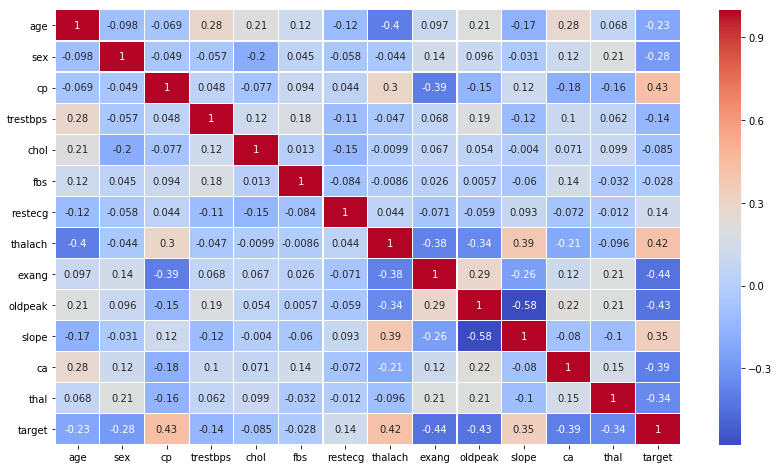

In [67]:
# We can now generate a heatmap, to show the comparison of the values

plt.figure(figsize=(14,8))
sns.heatmap(data_frame.corr(), annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

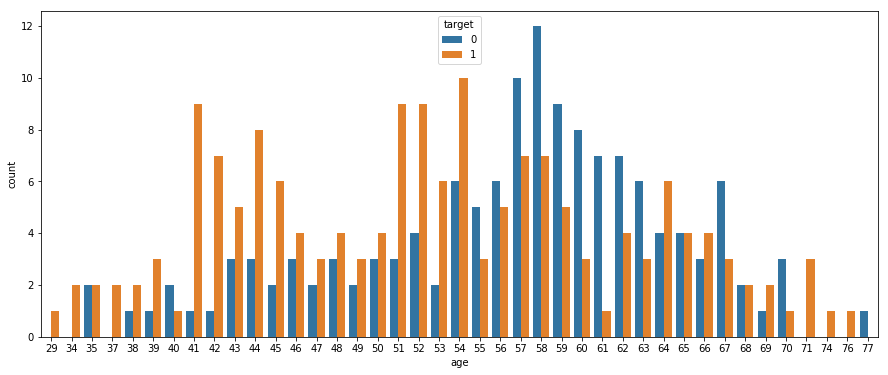

In [68]:
# It might be useful, to look at age vs heart disease for example

plt.figure(figsize=(15,6))
sns.countplot(x='age',data = data_frame, hue = 'target')
plt.show()

In [69]:
# Splitting the data for target vs data

X = data_frame.drop('target', axis=1)
y = data_frame['target']

# Using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# preprocessing the data (scaling features, found a link on the interwebs)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

/home/hermansen/Desktop/jupyter/env/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/hermansen/Desktop/jupyter/env/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [70]:
# Using KNeighrest neightbor

clf = KNeighborsClassifier()
params = {'n_neighbors': [i for i in range(1,33,2)]}

model = GridSearchCV(clf, params, cv=10)

model.fit(X_train,y_train)
model.best_params_

/home/hermansen/Desktop/jupyter/env/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_neighbors': 7}

In [71]:
# predict

predict = model.predict(X_test)

print('Accuracy Score: ', accuracy_score(y_test, predict))

Accuracy Score:  0.8032786885245902


##### Discussion

Above we imported the data, analysed that it had no null-entries, and showed a few plots. Then we selected a feature and train_set_split for the data.

After that we used a min-max scaler to even out the entries of the features.

Using k-nearest neighbors, we found the best parameter to for n_neighrest neighbor.
After that we added predictions for our test data and scored out accuracy.

##### Conclusion

We added a dataset from kaggle and took inspiration from the various kernels submitted, we ended up learning a bit about minmax scaler and GridSearch. The rest we knew. As we handled the dataset ourselves, we also got some insight into pandas for data analysis.

### dummy classifiers

Now it's time to classify a dataset, based on binary features, is 5 is not 5 etc. The MNIST dataset is used again , with previously defined get functions. Stochastic Gradient Descent is used, and later a DummyClassifier is created to emulate the behavior of a classifier. Analysis is the done on the model and the test data, left over.

#### Qa) Add a Stochastic Gradient Decent [SGD] Classifier

##### Introduction

This exercise is about adding stochastic gradient descent to some MNIST test data and classify it according to is digit 5 or is it not 5. For lack of a better method, a few samples are shown, to showcase if the model is fitted to the data.

##### Exercise

In [72]:
# Preparation
%load_ext autoreload
%matplotlib inline

import sys,os
import numpy as np
from sklearn.linear_model import SGDClassifier
import libitmal.dataloader as dataloader

sys.path.append(os.path.expanduser(path))


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [73]:
# Exercise
%autoreload

(X_train, y_train), (X_test, y_test) = dataloader.MNIST_GetDataSet()

# Shuffle the data
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

# reshape our date for train
if X_train.ndim==3 and X_test.ndim==3:
    print("reshaping X and y..")
    X_train = X_train.reshape(
        X_train.shape[0], 
        X_train.shape[1]*X_train.shape[2])
    X_test = X_test.reshape(
        X_test.shape[0], 
        X_test.shape[1]*X_test.shape[2])

# setting our classification "5s"
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)


# Classify and fit
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

# Predict with our test data
arraytrue = sgd_clf.predict(X_test)


reshaping X and y..


/home/hermansen/Desktop/jupyter/env/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Showing the predicted 5s


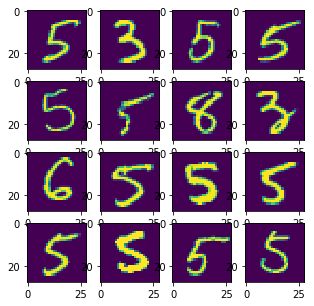

Showing numbers that are predicted to not be 5


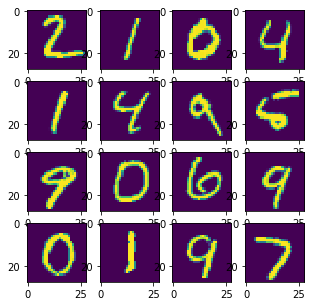

In [74]:
# Result

# sort data
correct_list = []
incorrect_list = []

for i in range(0, len(arraytrue)):
    if arraytrue[i] == True:
        correct_list.append(X_test[i])
    else:
        incorrect_list.append(X_test[i])

import matplotlib.pyplot as plt
        
# group plot
def plot_digit(data, fignr):
    w=10
    h=10
    fig=plt.figure(fignr, figsize=(5, 5))
    columns = 4
    rows = 4
    for i in range(1, columns*rows +1):
        img = data[i].reshape(28, 28)
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
    plt.show()

# show predictions
print("Showing the predicted 5s")
plot_digit(correct_list, 0)

print("Showing numbers that are predicted to not be 5")
plot_digit(incorrect_list, 1)

##### Discussion

As seen above, the above plot has far more 5's than the one below it, while it's not perfect, it is able to identify the hand-written letters using the classifier.

##### Conclusion

As mentioned in the discussion, the data has been classified, and a sample of 32 images are shown, from both the y != 5 batch and the y == 5 batch.

#### Qb) Implement a dummy binary classifier

##### Introduction

In this exercise a we give it a shot creating a classifier. It will however, be very basic. It will show the amount of 5s in the test set.

##### Exercise

In [75]:
# Preparation

import numpy as np
from sklearn.base import BaseEstimator
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
import libitmal.utils as itmalutils

In [76]:
# Exercise

# Dummy classifier
class DummyClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

model = DummyClassifier()    

c_sgd=cross_val_score(sgd_clf, X_test, y_test, cv=3, scoring="accuracy")
c_dummy=cross_val_score(model, X_test, y_test, cv=3, scoring="accuracy")

y_sgd_pred = cross_val_predict(sgd_clf, X_test, y_test_5, cv=3)
y_dummy_pred = cross_val_predict(model, X_test, y_test_5, cv=3)

M_sgd=confusion_matrix(y_test_5, y_sgd_pred)
M_dummy=confusion_matrix(y_test_5, y_dummy_pred)


/home/hermansen/Desktop/jupyter/env/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/hermansen/Desktop/jupyter/env/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/hermansen/Desktop/jupyter/env/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassi

In [77]:
# Result

print("y_test_5 shape: ", y_test_5.shape)

y5_true = []
y5_false = []
for y in y_test_5:
    if y == True:
        y5_true.append(y)
    else:
        y5_false.append(y)
        
print("y == 5 count:", len(y5_true), "y != 5 count:", len(y5_false))

print("SGD, c=",c_sgd)
print("Dummy, c=",c_dummy)

itmalutils.PrintMatrix(M_sgd,"SGD, M=")
itmalutils.PrintMatrix(M_dummy,"Dummy, M=")

y_test_5 shape:  (10000,)
y == 5 count: 892 y != 5 count: 9108
SGD, c= [0.81605752 0.87008701 0.86933013]
Dummy, c= [0.0914817  0.0990099  0.10351035]
SGD, M=[[8957  151]
        [ 245  647]]
Dummy, M=[[9108    0]
          [ 892    0]]


##### Discussion

The class above is implemented according to the fit-predict scheme from the BaseEstimator class. It is fitted and categorized and shown in the the score is created with cross validation score, and the fitting is handled by corss validation prediction. Lastly, the predictions is through a cross matrix, that shows True Negatives, False Negatives, False Positives and True Positives. 

##### Conclusion

As seen above, the function created has the correct amount of samples in the batch, we are not quite sure if it's in the correct batch, but it might be the fault of the DummyClassifier, the SGD however, fills the 2x2 cross matrix with values, as it should for a classificer with a score below 1. 

### metrics

#### Qa)

##### Introduction
In this exercise we will implement a general accuracy function `MyAccuracy`, that takes `y_pred` and `y_true` as input parameters.
We will Reuse our MNIST data loader and test the `MyAccuracy` function  both on our dummy classifier and on the Stochastic Gradient Descent classifier
##### Exercise

In [78]:
# Preparation
import numpy as np
import sys,os
sys.path.append(os.path.expanduser('/home/hermansen/Desktop/jupyter/itmal/itmal-25/itmal-25f'))
import libitmal.dataloader as dataloader
import libitmal.utils as itmalutils
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
%matplotlib inline
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [79]:
# Exercise
(X_train, y_train), (X_test, y_test) = dataloader.MNIST_GetDataSet()

def find_TP(y_true, y_pred):
    return sum((y_true == 1) & (y_pred == 1))
def find_FN(y_true, y_pred):
    return sum((y_true == 1) & (y_pred == 0))
def find_FP(y_true, y_pred):
    return sum((y_true == 0) & (y_pred == 1))
def find_TN(y_true, y_pred):
    return sum((y_true == 0) & (y_pred == 0))

def find_conf_matrix_values(y_true,y_pred):
    TP = find_TP(y_true,y_pred)
    FN = find_FN(y_true,y_pred)
    FP = find_FP(y_true,y_pred)
    TN = find_TN(y_true,y_pred)
    return TP,FN,FP,TN

# Shuffle the data
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

y_train_5 = (y_train == 5) 
y_test_5 = (y_test == 5)

# reshape our date for train
if X_train.ndim==3 and X_test.ndim==3:
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

y_pred = sgd_clf.predict(X_train)
y_true = y_train_5

TP,FN,FP,TN = find_conf_matrix_values(y_true,y_pred)  

/home/hermansen/Desktop/jupyter/env/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [80]:
# Result
def MyAccuracy(y_pred, y_true):
    return ((TP+TN)/(TP+TN+FP+FN))

# TEST FUNCTION: compare with Scikit-learn accuracy_score
def TestAccuracy(y_pred, y_true):
    a0=MyAccuracy(y_pred, y_true)
    a1=accuracy_score(y_pred, y_true)

    print("\nmy a          =",a0)
    print("scikit-learn a=",a1)

    itmalutils.InRange(a0,a1)
    
TestAccuracy(y_pred, y_true)


my a          = 0.954
scikit-learn a= 0.954


##### Discussion
We created our own confusion matrix function and used the TP,FN,FP,TN values to calculate the accuracy from our MNIST test data.
##### Conclusion
As the result above shows we managed to create a MyAccuracy function which will calculate the same accuracy score as the accuray_score function from sklearn.

#### Qb) 

##### Introduction
In this exercise we will implement the `MyPrecision`, `MyRecall` and `MyF1Score` functions, again taking MNIST as input, using the SGD and the Dummy classifiers. We will make some tests to compare to the functions found in Scikit-learn...

##### Exercise

In [81]:
# Preparation
from sklearn.metrics import precision_score, recall_score, f1_score

In [82]:
# Exercise
def MyPrecision(y_true, y_pred):
    return TP/(TP+FP)

def MyRecall(y_pred, y_true):
    return TP/(TP+FN)

def MyF1Score(y_pred, y_true):
    return (2*(MyPrecision(y_pred, y_true)*MyRecall(y_pred, y_true))/(MyPrecision(y_pred, y_true)+MyRecall(y_pred, y_true)))


In [83]:
# Result
print("My Precision: %.3f"%MyPrecision(y_true, y_pred))
print("Sklearn Precision : %.3f"%precision_score(y_true, y_pred))
print("My Recall: %.3f"%MyRecall(y_true, y_pred))
print("Sklearn Recall : %.3f"%recall_score(y_true, y_pred))
print("My F1Score: %.3f"%MyF1Score(y_true, y_pred))
print("Sklearn F1Score : %.3f"%f1_score(y_true, y_pred))

My Precision: 0.691
Sklearn Precision : 0.691
My Recall: 0.889
Sklearn Recall : 0.889
My F1Score: 0.777
Sklearn F1Score : 0.777


##### Discussion
The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
The recall is intuitively the ability of the classifier to find all the positive samples.
The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. 
##### Conclusion
We see that we managed to create all three functions with the same output as the functions from sklearn. Since our data is binary arranged, this proved to be much easier.

#### Qc) 

##### Introduction
In this exercise we will look at howe the Scikit-learn confusion matrix are organized, where are the TP, FP, FN and TN located in the matrix indices.

Finally, we will compare the real and symmetric auto-covariance matrix, $\Sigma$, with the real but non-symmetric confusion matrix, $\mathbf{M}$. We will explain what the diagonal represent in the covar- and confusion matrix respectively, and why the covar-  is symmetric, while the confusion not? 

##### Exercise

In [84]:
# Preparation
from sklearn.metrics import confusion_matrix
from sklearn.base import BaseEstimator
from sklearn.model_selection import cross_val_score, cross_val_predict
import libitmal.utils as itmalutils

In [85]:
# Exercise
class DummyClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

model = DummyClassifier()  

y_sgd_pred = cross_val_predict(sgd_clf, X_test, y_test_5, cv=3)
y_dummy_pred = cross_val_predict(model, X_test, y_test_5, cv=3)

/home/hermansen/Desktop/jupyter/env/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/hermansen/Desktop/jupyter/env/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/hermansen/Desktop/jupyter/env/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassi

In [86]:
# Result
M_SGD=confusion_matrix(y_test_5, y_sgd_pred)
itmalutils.PrintMatrix(M_SGD,"SGD, M=")
M_DUMMY=confusion_matrix(y_test_5, y_dummy_pred)
itmalutils.PrintMatrix(M_DUMMY,"Dummy, M=")

SGD, M=[[8957  151]
        [ 245  647]]
Dummy, M=[[9108    0]
          [ 892    0]]


##### Discussion
Scikit-learn confusion matrix is organized after the following scheme and it show where TP, FP, FN and TN is located.

<img src="Figs/ConfusionMatrix.png" style="width:400px">

... and based on the code above, where we calculate confusion matrix, using scikit function sklearn.metrics.confusion_matrix. which takes as an argument the actual values from the dataset and the predicted values generated by the fitted model, and outputs a confusion matrix.  We can see that the result matches the scheme above:

    M = [[8957     151] # True Positives = 8957, False Negatives = 151
        [ 245     647]] # False Positives = 245, True Negatives = 647

The auto-covariance matrix measures the variance between all features and therefore generates a symmetric matrix where the diagonal is the known common variance.
The Confusion matrix has the same dimension as the covariance matrix, but is not symmetric. The diagonal in the confusion matrix has a special meaning, since it is here that we would like to be model- and fit- wise: it is the correctly classified values, while the off-diagonal is all that is misclassified.
So, building the auto-covariance and confusion matrix is similar, while the content is different. Typically, the auto-covar matrix is used to analyze data within fit, whereas the confusion matrix is used to judge one's model and data fit after learning.

##### Conclusion
We now understand the difference between an auto-covariance matrix and a confusion matrix and now know what the values in the confusion matrix means.

#### Qd) 

##### Introduction
In this exercise we will generate a _heat map_ image for the confusion matrices, `M_dummy` and `M_SGD` respectively.

##### Exercise

In [87]:
# Preparation
import matplotlib.pyplot as plt

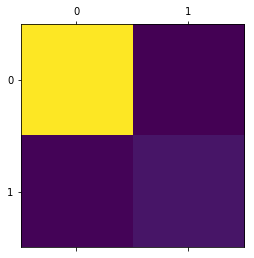

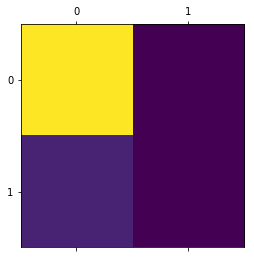

In [88]:
# Exercise
plt.matshow(M_SGD)
plt.show();

plt.matshow(M_DUMMY)
plt.show();

##### Discussion
Confusion matrix heat map tells us how our data is organized and how TP, FP, UN and TN are located.  With confusion matrix we can provides a better picture for further analysis.  We provide a clearer picture of the differences in the performance of the classifiers data. Confusion matrix provides an exact distribution of the number of points that were incorrectly classified under each category.

##### Conclusion
Thus, we can conclude how we have used Scikit-learn with TensorFlow to perform different classification experiments and view the performances of each of the classifier. In this way, we have got a better overview of our data and its performance and how the data is organized.


## Wiki page

### Pulling Data Sets from Kaggle and Making Sense of It - Group 25

Pulling Data Sets from Kaggle & Making Sense of It
Introduction
Kaggle is an online community for data scientists and machine learners its run by Google. Kaggle has two fundamental parts, sharing data and processing the data, these parts are driven by competition, by its users. Kaggle is a huge platform, where a multitude of different types of data is available. On this page, we will download one and trying to make sense of it.

Article
This guide uses pandas, numpy, matplotlib and scipy

In the article, we are going to look at the Data Set "Breast Cancer Wisconsin"

Getting the data
We will start off with getting the actual data set, this can either be done through the website, or the kaggle-api (cli-tool). We will use the kaggle-api.

```
# pip install kaggle
Download your api-token and place it in:
Windows: C:\Users\<username>.kaggle\kaggle.json
Linux: ~/.kaggle/kaggle.json
```

Now run the command:

```
# kaggle datasets download -d uciml/breast-cancer-wisconsin-data
# unzip breast-cancer-wisconsin-data.zip
# ls
inflating: data.csv
Now we've got the data set.
```

Add imports to a python file of your choice

```python
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plot
Now load the data.csv file from before

data = pd.read_csv("data.csv")
To view all the columns in simple format

def print_header(cs):
  print("Dataset header")
  for c in cs:
    print(c)

print_header(data.columns.tolist())

# Output
# Dataset header
# id
# diagnosis
# ...
```

It may be useful to see some data so that we can gain an overview of how our data is structured and what we've got to work with.

data.head(10) # prints the header and 9 rows of data
From the output, we can see a few things, the id is next to useless, this data is probably from some kind of database with unique identifiers, we don't need that data. diagnosis shows if the tumor was malignant or benign. This is a useful binary property. unnamed is useless, as we've got no idea what that data is, and it's unclean too. 

let's choose our y labels and x features

```python
y = data.diagnosis
x = data.drop(["id", "diagnosis", "Unnamed: 32"]) 
# id and Unnamed are useless and diagnosis is our feature
```

Let's plot our labels

```python
ax = sns.countplot(y, label="Count")
# output
```

We can now calculate some properties of our features and try to make sense of it

```python
x.describe()
# output omitted
```

To show how our features compares with our labels, let's plot it with a boxplot

```python
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)
#output
```

Now it's easy to see the weights that influence the different features, for each label.

